In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('twitterdata.parquet')

In [3]:
df.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [4]:
df.shape

(416809, 2)

In [ ]:
import pandas as pd
import eda

def preprocess_data(file_path):

    df = pd.read_parquet(file_path)

    df = df.dropna()
    # print("Nulls: ")
    # print(df.isnull().sum())
    print(df.duplicated())
    df.drop_duplicates()

    e_map = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}
    df['emotion'] = df['label'].map(e_map)

    df['txt_len'] = df['text'].apply(len)

    df = df.drop(columns=['label'])
    
    bins = [0, 50, 100, float('inf')]  
    labels = ['short', 'medium', 'long']
    df['lenCat.'] = pd.cut(df['txt_len'], bins=bins, labels=labels)

    df.to_csv('res_dpre.csv', index=False)
    print("Preprocessing complete. Data saved to 'res_dpre.csv'.")

    return 'res_dpre.csv'

if __name__ == "__main__":
  
    eda.eda_analysis('res_dpre.csv')


In [11]:
preprocess_data('twitterdata.parquet')

Missing values in each column:
text     0
label    0
dtype: int64
Filled missing values in 'text' column.


/tmp/ipykernel_16129/1911696862.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['text'] = df['text'].fillna(method='ffill')


Dropped rows with empty 'text' values.
Mapped numeric labels to emotion names.
Created 'text_length' feature.
Dropped 'label' column.
Discretized 'text_length' into categories.
Preprocessing complete. Data saved to 'res_dpre.csv'.


'res_dpre.csv'

In [13]:
df = pd.read_csv('res_dpre.csv')

In [14]:
df

,text,emotion,text_length,text_length_category
0,i feel awful about it too because it s my job ...,sadness,112,long
1,im alone i feel awful,sadness,21,short
2,ive probably mentioned this before but i reall...,joy,152,long
3,i was feeling a little low few days back,sadness,40,short
4,i beleive that i am much more sensitive to oth...,love,99,medium
...,...,...,...,...
416804,that was what i felt when i was finally accept...,joy,117,long
416805,i take every day as it comes i m just focussin...,fear,202,long
416806,i just suddenly feel that everything was fake,sadness,45,short
416807,im feeling more eager than ever to claw back w...,joy,98,medium


In [ ]:
import pandas as pd
import vis

def eda_analysis(file_path):
    df = pd.read_csv(file_path)

    insights = [
        f"Total records: {len(df)}",
        f"Average length of tweets: {df['text'].str.len().mean()}",
        f"Most common emotion: {df['emotion'].mode()[0]}"
    ]

    emotion_counts = df['emotion'].value_counts(normalize=True) * 100
    emotion_counts.to_csv('eda-in-4.txt', header=True)

    unique_tweets = df['text'].nunique()
    insights.append(f"Unique tweets: {unique_tweets}")

    min_len = df['text'].str.len().min()
    max_len = df['text'].str.len().max()
    median_len = df['text'].str.len().median()
    insights.extend([
        f"Min length of tweet: {min_len}",
        f"Max length of tweet: {max_len}",
        f"Median length of tweet: {median_len}"
    ])

    for i, insight in enumerate(insights):
        with open(f'eda-in-{i+1}.txt', 'w') as f:
            f.write(insight)

    print("EDA done now visualization")
    return 'res_dpre.csv'

if __name__ == "__main__":

    vis.visualize('res_dpre.csv')


In [20]:
df = pd.read_csv('res_dpre.csv')

In [21]:
df

,text,emotion,text_length,text_length_category
0,i feel awful about it too because it s my job ...,sadness,112,long
1,im alone i feel awful,sadness,21,short
2,ive probably mentioned this before but i reall...,joy,152,long
3,i was feeling a little low few days back,sadness,40,short
4,i beleive that i am much more sensitive to oth...,love,99,medium
...,...,...,...,...
416804,that was what i felt when i was finally accept...,joy,117,long
416805,i take every day as it comes i m just focussin...,fear,202,long
416806,i just suddenly feel that everything was fake,sadness,45,short
416807,im feeling more eager than ever to claw back w...,joy,98,medium


In [22]:
eda_analysis('res_dpre.csv')

EDA done now visualization


'res_dpre.csv'

/tmp/ipykernel_16129/3231720044.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', palette='Set2')


<AxesSubplot: xlabel='emotion', ylabel='count'>

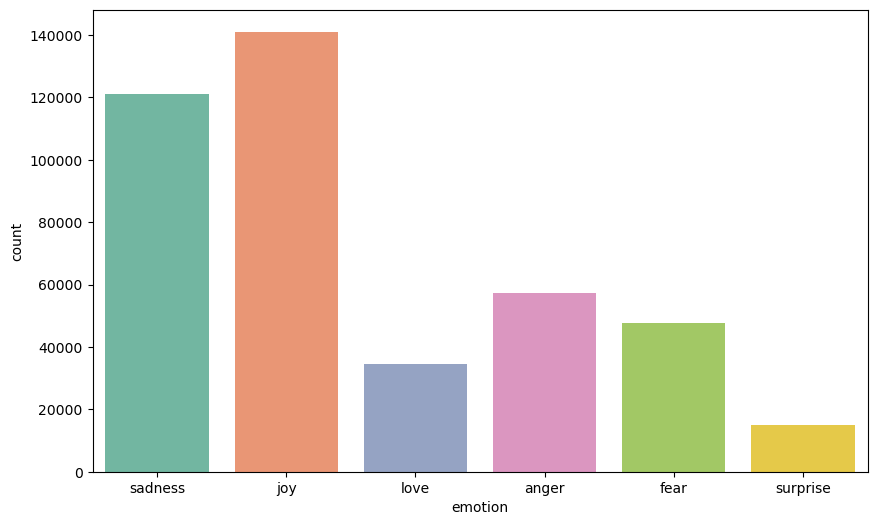

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emotion', palette='Set2')

In [32]:
from sklearn.cluster import KMeans

df = pd.read_csv('res_dpre.csv')
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df.select_dtypes(include=[float, int]))

# Save cluster counts
cluster_counts = df['cluster'].value_counts()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

def run_kmeans(file_path):
    df = pd.read_csv(file_path)
    kmeans = KMeans(n_clusters=3, random_state=0)
    df['cluster'] = kmeans.fit_predict(df.select_dtypes(include=[float, int]))

    # Save cluster counts
    cluster_counts = df['cluster'].value_counts()
    with open('k.txt', 'w') as f:
        f.write(str(cluster_counts))

    print("Modeling complete.")

if __name__ == "__main__":
    print("Pipeline complete.")


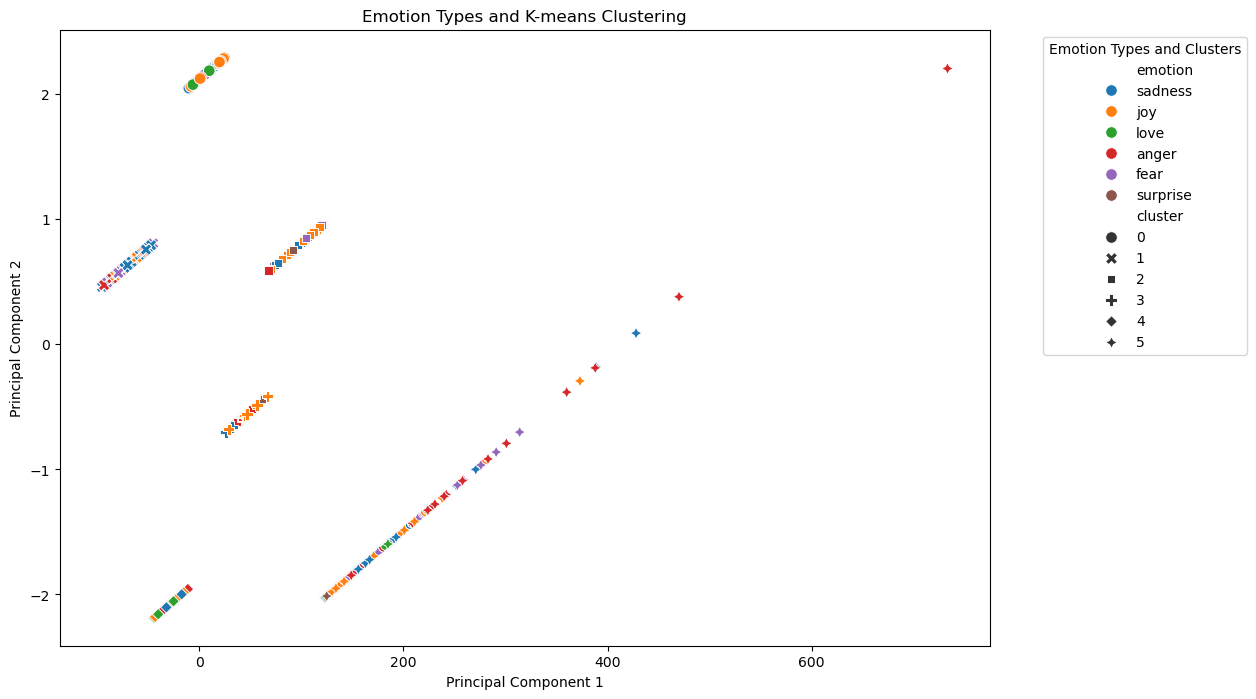

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('res_dpre.csv')

# Apply K-means clustering with n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=0)
df['cluster'] = kmeans.fit_predict(df.select_dtypes(include=[float, int]))

# Save cluster counts
cluster_counts = df['cluster'].value_counts()
with open('k.txt', 'w') as f:
    f.write(cluster_counts.to_string())

# Dimensionality reduction with PCA to visualize in 2D space
pca = PCA(n_components=2)
df[['pca1', 'pca2']] = pca.fit_transform(df.select_dtypes(include=[float, int]))

# Plot with emotions as colors and clusters as shapes
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='pca1', y='pca2',
    hue='emotion',          # Color by emotion type
    style='cluster',        # Shape by cluster
    palette='tab10',        # Adjust color palette as needed
    s=70                    # Size of points
)

# Add titles and labels
plt.title("Emotion Types and K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Emotion Types and Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('kmeans_emotion_clusters.png')
plt.show()
